# Deep Learning

refs:
* https://blog.goodaudience.com/artificial-neural-networks-explained-436fcf36e75

## Main concepts 


ANN can learning non-linear relationships 

<img src="images/non-linear_and_linear_decision_edge.png" width="400" align="left"/> 



### Architecture

* neuron

<div style="clear:both">
<img src="images/neuron_ANN.png" width="400" align="left"/> 
</div>

<br>

<div style="clear:both">
** activation func (**allow ANN to learn no-linear relationships**) 

    Good activatiobn functions has non-linear shapes, easy to compute the function and the first derivative of the function

*** **sigmoid function**: most common function. widely used on logiostic regression  
**** (range: 0.0 and 1.0)  
**** good for binnary classifiers (output layer) 


*** **softmax**: 
**** range: vector where each element is between 0.0 and 1.0. There is nclass elements in the vector output
**** good for multi-class classificatio (output layer)
**** emphsaize the most likely class and return probabilities

*** **tanh**: hyperbolic tangent   
**** range: -1.0 and 1.0  
**** mean value is zero this is good in optimization problems (remember why we should normalize the input features)  
**** good for hidden layers  

*** **ReLu**: very common  
*** range: 0  and inf   
*** good for hidden layers  
</div>

* layers  

<div style="clear:both">
<img src="images/layers.jpeg" width="400" align="left"/> 
</div>

<br>

<div style="clear:both">
* Loss

*** **cross-entropy loss** or **or log loss**: measure the performance of classifier where the outputs ranging between 0.0 and 1.0 

Cross-entropy loss increases as the predicted probability diverges from the actual label
Is the average of log likelihood over all the data

* Forward Propagation: computes the output given an input. (used in train and prediction phase)

* Back-propagation: computes the gradiens in order to train the model while the ANN is learning. Only used in train phase
</div>

## How to train recipe

refs: http://karpathy.github.io/2019/04/25/recipe/

1. General advices

    * fast n furious approach does not work
    * patient and pay attention in detail tends to work (correlates with success)
    * being defensive and obsessed about visualizations works
    * do baby steps and avoid to **introduce a lot of unverified complexity at once**
    * Build simple to complex
    * ReLu are good for hidden layers
        * Positive side learn faster than logistic and tanh due to the slope
        * The Negative side can make train stuck caused by dead neurons where the gradient becomes zero
    
1. Become one with data 

    * inspect data
    * try to see patterns (your brain is good at it)
    * always check for:
        * duplicated 
        * corrupted data
        * wrong labels (if not systemic may not hurt to much)
        * imbalance data
        
1. Set up pipeline for trainning and evaluations and test it

    * work with fixed seed
    * simplify . does not add any regularization
    * **verify loss init**: -log(1/n_classes) for classifiers
    * **overfit one batch or small train sample dataset as little as 2**
    * **input independent** (shuffles labels) (the DNN should not learn. See the errors in test n val dataset)
    * visualize the input of DNN. y_hat = model(X). Vis X.  

1. Overfit (reduce bias error)

    * overfit
        * focus in **train loss** should be close to zero
        * if you try with many models  that you increased the complexity can suggest that you have a BUG
    * do not be a hero. start with the most related paper and copy and paste their simple architecture.
        * for images, ResNet-50 is a good start
        * for voice, xvectors
    * **Adam is safe with learning rate e3-4** !? but you can try different learning rate.
    * **Add complexity only one at time**. If you have multiple features. Suggest to add one by one and unsure you get a performance boost. Or you can try smaller image and the increase the image size 
    * **do not trust learning rate decay**. He always disable learning rate decays entirely. It is a personal advice. less problematic maybe

1. Regularize (reduce variance error)

    * **get more data** is by the far preferred way to regularize a model. It is **the only guarantee way to improve the model.**
    * **data augmentation**. The next best thing
    * **pretrain**. It is really rarely hurts to use a pre-trained network even if you have enough data.
        * xvectors
        * ResNet-50
    * **make smaller input dimensionality**. Remove features that can have spurious signal (Remove ciorrelated features)
    * **make smaller model**. Personal advise
        * He used to use FC layers after ImageNet, but these days he uses average pooling. eliminating a tons of parameters
    * **decrease batch size**. helps with regularization
    * **dropout**
    * **early stopping**
    
1. Tune

    * **random over grid search** Never use grid serach
    * **hyper-parameter optmization**
    
    
1. Squeeze the juice (It is not preference)

    * leave it training. One time he forgot one model running and get SOTA (state of the art) !?
    * ensembles
        * TODO: read this paper about hot to use ensemble to build one simple model: https://arxiv.org/abs/1503.02531
    

## Learning rate diagnostics 

* refs:
    
    * https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10   (approach to detrmine best lr)
    * https://www.dataquest.io/blog/learning-curves-machine-learning/



In [1]:
!pwd
!ls images

/mnt/sdb1/leandro/ds_pragmatic_programming
data_frame.png				 pathlib_cheatsheet_p1.png
iris_petal_sepal.png			 pivot-table-datasheet.png
layers.jpeg				 refactor_notebooks.png
neuron_ANN.png				 resampling.png
non-linear_and_linear_decision_edge.png  smote.png
notebook_vs_code.png			 split-apply-combine.png
onehot.png				 tomek.png


### Bias and variance trade-off 

**Train error still to much high for the application**

<img src="images/biasvariance.png" height="250" width="400">

**variance error is related to gap between train and error** 

There is a minimum total error

<img src="images/irr_error.png" height="250" width="400">

### High bias


* left: high bias and low variance 
* right: high bias and high variance

What to do:

* Adding more training instances.
* Adding more features.
* Feature selection.
* Hyperparameter optimization
* train longer (deep learning)

<img src="images/add_data.png" height="400" width="600">

### Low bias high variance error


* left: low variance 
* right: high variance

What to do?

* Adding more training instances.  

* Increase the regularization for our current learning algorithm. This should decrease the variance and increase the bias.  

    * L1 or L2
    * dropout

* Reducing the numbers of features in the training data we currently use. The algorithm will still fit the training data very well, but due to the decreased number of features, it will build less complex models. This should increase the bias and decrease the variance. 


<img src="images/low_high_var.png" height="400" width="600">

### Learning rates 

Learning rate controls how much we are adjusting the weights of our network with respect the gradient of the loss function. 


<img src="images/learning_rate.png" height="400" width="600">

* Too small: **Less training time, lesser money spent on GPU cloud compute. :)**
* Too large: does not converge

<img src="images/learning_rate2.png" height="200" width="300">

### Is there a methodology to detrmine best learning rate?

In the article **Cyclical Learning Rates for Training Neural Networks""** Leslie N. Smith argued that you could estimate a good learning rate by training the model initially with a very low learning rate and increasing it (either linearly or exponentially) at each iteration.


1. change the learningrate at each minibatch (lienarlly or exponentially)
1. plot the learning rate (log) against loss; (choose the one close to the minumum)


**The python package fastai has function to do that** fastai is like keras for pytorch

### Tips n learning curve diagnostics

* https://stats.stackexchange.com/questions/345990/why-does-the-loss-accuracy-fluctuate-during-the-training-keras-lstm

* https://stats.stackexchange.com/questions/187335/validation-error-less-than-training-error 

**Summary**

* val loss or error smaller than train reasons
    * diff in train and val data distributions. 
        * Maybe train has harder case while validation has more easy cases.
        * data wrongly labeledin train datasets
        * dropouts (highe level) can cause that sometimes

* loss oscilation reasons
    1. batch_size is too small
    1. large neural network and small data  (**always compare #parmeters and #samples**)
    
    
* Batch size trade off (alsoe related to previous one)
    * too large make training slow
    * too small loss oscilation and takes more epoch to converge
    * large batch (**small number of mini batches** per epoch) size can make the DNN not learn

You can think of model evaluation in four different categories:

1. Underfitting – Validation and training error high

1. Overfitting – Validation error is high, training error low

1. Good fit – Validation error low, slightly higher than the training error

1. Unknown fit - Validation error low, training error 'high'


I say 'unknown' fit because the result is counter intuitive to how machine learning works. The essence of ML is to predict the unknown. If you are better at predicting the unknown than what you have 'learned', AFAIK the data between training and validation must be different in some way. 


=================================

There are several reasons that can cause fluctuations in training loss over epochs. The main one though is the fact that almost all neural nets are trained with different forms of stochastic gradient decent. This is why batch_size parameter exists which determines how many samples you want to use to make one update to the model parameters. If you use all the samples for each update, you should see it decreasing and finally reaching a limit. Note that there are other reasons for the loss having some stochastic behavior.

This explains why we see oscillations. But in your case, it is more that normal I would say. Looking at your code, I see two possible sources.

Large network, small dataset: It seems you are training a relatively large network with 200K+ parameters with a very small number of samples, ~100. To put this into perspective, you want to learn 200K parameters or find a good local minimum in a 200K-D space using only 100 samples. Thus, you might end up just wandering around rather than locking down on a good local minima. (The wandering is also due to the second reason below).

Very small batch_size. You use very small batch_size. So it's like you are trusting every small portion of the data points. Let's say within your data points, you have a mislabeled sample. This sample when combined with 2-3 even properly labeled samples, can result in an update which does not decrease the global loss, but increase it, or throw it away from a local minima. When the batch_size is larger, such effects would be reduced. Along with other reasons, it's good to have batch_size higher than some minimum. Having it too large would also make training go slow. Therefore, batch_size is treated as a hyperparameter.

### Gradient descent algorithms

refs: https://stats.stackexchange.com/questions/49528/batch-gradient-descent-versus-stochastic-gradient-descent

$
J(\theta)=\frac{1}{2}\sum_{i=1}^N(y_i−h_{\theta}(x_i)^2
$

$
\theta_j = \theta_j − \alpha \frac{\partial J(\theta)}{\partial \theta_j} 
$

The update is given by 


$
\Delta \theta_j = \alpha \frac{\partial J(\theta)}{\partial \theta_j} \equiv  \sum_{i=1}^N(y_i−h_{\theta}(x_i))x_i
$

1. Gradient descent  

    1. Compute the gradient of the cost function using the entire dataset 
    
    1. Update the weights.
    
    Pros n cons  
    
    * **Computational slow and utilizes a lot of memory**  
    * Guarantee that loss func always will reduce  
    

1. Stochastic Gradient Descent
    1. Compute gradient for each sample
    
    pros n cons  
    
    * More sensible to noisy  
    * Faster than Gradient decsent  
    * Use less memmory   


1. Mini batch Gradient  

    1. Compute gradient for each mini batch (This is a estimation of the true Gradient )  

    Pros n Cons  
    
    * More robust to noisys data
    * Faster than all methods
    * Use less memory than Gradient but more than Stochastic
    

See this discusison for batches sizes:
* https://stats.stackexchange.com/questions/316464/how-does-batch-size-affect-convergence-of-sgd-and-why

>  the minibatch size gets larger the convergence of SGD actually gets harder/worse,

* Paper: https://research.fb.com/publications/accurate-large-minibatch-sgd-training-imagenet-in-1-hour/

>  large minibatches cause optimization difficulties, but when these are addressed the trained networks exhibit good generalization.  

* https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network/236393#236393 

> It has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize. 

## Tensorflow 

**TODO** Change for 2.0

refs:

https://www.tensorflow.org/tutorials/estimators/cnn

### Install

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

```sh
conda create -n tensorflow_cpu pip python=3.6

source activate tensorflow_cpu

# install tensorflow 
pip install --ignore-installed --upgrade tensorflow==1.9

# test instalations
python -c "import tensorflow as tf; print(tf.__version__)"

# Save enviroment for later use
conda env export > tensorflow_cpu.yml
conda list -e > requirements.txt

# actvate the enviroment in jupyter notebook
# RUN outisde the env tensorflow
# In caseyou want to use the same terminal you need to run deactivate
deactivate

# install ipykernel
conda install -c anaconda ipykernel 

# install env in jupyter notebook. NOW youcan select this env n change kernel tab
python -m ipykernel install --user --name tensorflow_cpu --display-name "Python (tensorflow)"
```


In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

slim = tf.contrib.slim

%matplotlib inline
np.random.seed(1)

print(tf.__version__)

/home/leandroohf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


### Basics 

* define variables, const n placeholders

**remember to initialize your variables, create a session and run the operations inside the session**. 

A placeholder is an object whose value you can specify only later. 
To specify values for a placeholder, you can pass in values by using a "feed dictionary" (`feed_dict` variable). 


In [2]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss
    
    
# Change the value of x in the feed_dict
# See the function one hot encoding below
x = tf.placeholder(tf.int64, name = 'x')

with tf.Session() as sess: 
    print(sess.run(2 * x, feed_dict = {x: 3}))


print()
with tf.Session() as sess:

    x = tf.reshape(np.array([1,2,3,4,5,6,7,8,9]), [3, 3])    
    print(sess.run(x))
    
    print()
    # -1 means infere this dimension
    y = tf.reshape(np.array([1,2,3,4,5,6,7,8,9,10,11,12]), [2, -1])
    print(sess.run(y))
    
    print()
    z = tf.reshape(np.array([1,2,3,4,5,6,7,8,9,10,11,12]), [-1, 2, 3])
    
    zl = sess.run(z)

    print(np.shape(zl))
    print(zl)

9
6

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]

(2, 2, 3)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


### Encoding

* One hot encoding

https://www.tensorflow.org/api_docs/python/tf/one_hot

```txt
tf.one_hot(
    indices,
    depth,
    on_value=None,
    off_value=None,
    axis=None,
    dtype=None,
    name=None
)

Returns a one-hot tensor.


```

<img src="images/onehot.png" width="800" align="left"/>


In [ ]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name='C')
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    return one_hot

labels = np.array([1,2,3])

one_hot = one_hot_matrix(labels, C=3)
print ("one_hot = \n" + str(one_hot))

# I do not know when this case is important. BUt heklps understand depth
one_hot = one_hot_matrix(labels, C=4)
print ("one_hot = \n" + str(one_hot))


### Train 


- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).


In [ ]:
def load_dataset():
    
    train_dataset = h5py.File('data/train_signs.h5', "r")
    
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [ ]:
print(np.shape(classes))
print(classes)

# See example of image
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

* preprocessing the images

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# Normalize image vectors
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))

print()
print('64*64*3 = 12288')
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

print()
print ("Y_test (1st 5) = \n" + str(np.squeeze(Y_test[:,0:5])))



```python

# Use the loss function (approx. 1 line)
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)

```

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$




In [ ]:
def model_network():
    
    with tf.variable_scope('mymodel'):
        
    # Add a fully connected layer with 100 units.
    num_units = 100
    fc = slim.fully_connected(embeddings, num_units)

    # Add a classifier layer at the end, consisting of parallel logistic
    # classifiers, one per class. This allows for multi-class tasks.
    logits = slim.fully_connected( fc, _NUM_CLASSES, activation_fn=None, scope='logits')
        
    tf.sigmoid(logits, name='prediction')


with tf.Graph().as_default(), tf.Session() as sess:
    
    

### Prediction or inference

## Tensorflow slim

**TF-Slim: A high level library to define complex models in TensorFlow**

refs:

https://cv-tricks.com/tensorflow-tutorial/understanding-alexnet-resnet-squeezenetand-running-on-tensorflow/

https://github.com/tensorflow/models/blob/master/research/slim/slim_walkthrough.ipynb


**Comparing slim with tensorflow. You need less lines of code to do the same**. But tensorflow gives you more flexibility and it is easy to see the learning curves

```python
# using slim
net = slim.conv2d(input, 128,[3, 3], scope='conv1_1')

# slim version
with tf.name_scope('conv1_1') as scope:
    
    kernel = tf.Variable(tf.truncated_normal([3, 3,  64,128], dtype=tf.float32,stddev=1e-1), name='weights')
    conv = tf.nn.conv2d(input, kernel,[1, 1, 1, 1], padding='SAME')
 
    biases = tf.Variable(tf.constant(0.0, shape=[128], dtype=tf.float32), trainable=True, name='biases')
    
    bias = tf.nn.bias_add(conv, biases)
 
    conv1 = tf.nn.relu(bias, name=scope)
     
```

### Regression 

#### Define model network

In [3]:
def regression_model(inputs, is_training=True, scope="deep_regression"):
    """Creates the regression model.

    Args:
        inputs: A node that yields a `Tensor` of size [batch_size, dimensions].
        is_training: Whether or not we're currently training the model.
        scope: An optional variable_op scope for the model.

    Returns:
        predictions: 1-D `Tensor` of shape [batch_size] of responses.
        end_points: A dict of end points representing the hidden layers.
    """
    with tf.variable_scope(scope, 'deep_regression', [inputs]):
        
        end_points = {}
        
        # Set the default weight _regularizer and acvitation for each fully_connected layer.
        # To set defaults parameters for a layer type
        with slim.arg_scope([slim.fully_connected],
                            activation_fn=tf.nn.relu,
                            weights_regularizer=slim.l2_regularizer(0.01)):

            # Creates a fully connected layer from the inputs with 32 hidden units.
            net = slim.fully_connected(inputs, 32, scope='fc1')
            end_points['fc1'] = net

            # Adds a dropout layer to prevent over-fitting.
            net = slim.dropout(net, 0.8, is_training=is_training)

            # Adds another fully connected layer with 16 hidden units.
            net = slim.fully_connected(net, 16, scope='fc2')
            end_points['fc2'] = net

            # Creates a fully-connected layer with a single hidden unit. Note that the
            # layer is made linear by setting activation_fn=None.
            predictions = slim.fully_connected(net, 1, activation_fn=None, scope='prediction')
            end_points['out'] = predictions

            return predictions, end_points

        
# Underatnd the model
with tf.Graph().as_default():
    
    # Dummy placeholders for arbitrary number of 1d inputs and outputs
    inputs = tf.placeholder(tf.float32, shape=(None, 1))
    #outputs = tf.placeholder(tf.float32, shape=(None, 1))

    # Build model
    predictions, end_points = regression_model(inputs)

    # Print name and shape of each tensor.
    print("Layers")
    for k, v in end_points.items():
        print('name = {}, shape = {}'.format(v.name, v.get_shape()))

    # Print name and shape of parameter nodes  (values not yet initialized)
    print("\n")
    print("Parameters")
    for v in slim.get_model_variables():
        print('name = {}, shape = {}'.format(v.name, v.get_shape()))

Layers
name = deep_regression/fc1/Relu:0, shape = (?, 32)
name = deep_regression/fc2/Relu:0, shape = (?, 16)
name = deep_regression/prediction/BiasAdd:0, shape = (?, 1)


Parameters
name = deep_regression/fc1/weights:0, shape = (1, 32)
name = deep_regression/fc1/biases:0, shape = (32,)
name = deep_regression/fc2/weights:0, shape = (32, 16)
name = deep_regression/fc2/biases:0, shape = (16,)
name = deep_regression/prediction/weights:0, shape = (16, 1)
name = deep_regression/prediction/biases:0, shape = (1,)


#### Train


##### Using slim.learning.train

**Use slim training procedure is hard to get the learning curves and evaluations**. Its being criticized by the comunity. Might be why Google use slim to build the mode and for loop to train the model instead.

```python
 final_loss = slim.learning.train(
        train_op,
        logdir=ckpt_dir,
        number_of_steps=5000,
        graph=graph,
        save_summaries_secs=5,
        log_every_n_steps=500)

```


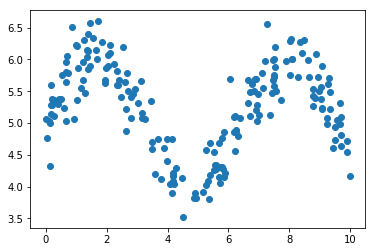

In [4]:
# Create fake data to test the mode

def produce_batch(batch_size, noise=0.3):
    xs = np.random.random(size=[batch_size, 1]) * 10
    ys = np.sin(xs) + 5 + np.random.normal(size=[batch_size, 1], scale=noise)
    return [xs.astype(np.float32), ys.astype(np.float32)]

# needs to run under with tf.Graph().as_default():
def convert_data_to_tensors(x, y):
    inputs = tf.constant(x)
    inputs.set_shape([None, 1])
    
    outputs = tf.constant(y)
    outputs.set_shape([None, 1])
    return inputs, outputs

x_train, y_train = produce_batch(200)
x_test, y_test = produce_batch(200)
plt.scatter(x_train, y_train)

I can run and the checkpoints will be save and I can change the learn rate and run again

In [9]:
# clean up checkppoints
!rm -vf tmp/regression_model/*

removed 'tmp/regression_model/checkpoint'
removed 'tmp/regression_model/events.out.tfevents.1557950295.leandroohf-VirtualBox'
removed 'tmp/regression_model/events.out.tfevents.1557950303.leandroohf-VirtualBox'
removed 'tmp/regression_model/events.out.tfevents.1557950313.leandroohf-VirtualBox'
removed 'tmp/regression_model/graph.pbtxt'
removed 'tmp/regression_model/model.ckpt-0.data-00000-of-00001'
removed 'tmp/regression_model/model.ckpt-0.index'
removed 'tmp/regression_model/model.ckpt-0.meta'
removed 'tmp/regression_model/model.ckpt-10000.data-00000-of-00001'
removed 'tmp/regression_model/model.ckpt-10000.index'
removed 'tmp/regression_model/model.ckpt-10000.meta'
removed 'tmp/regression_model/model.ckpt-5000.data-00000-of-00001'
removed 'tmp/regression_model/model.ckpt-5000.index'
removed 'tmp/regression_model/model.ckpt-5000.meta'
removed 'tmp/regression_model/model.ckpt.data-00000-of-00001'
removed 'tmp/regression_model/model.ckpt.index'
removed 'tmp/regression_model/model.ckpt.me

In [10]:
# Train a model
ckpt_dir = 'tmp/regression_model/'

with tf.Graph().as_default():
    
    tf.logging.set_verbosity(tf.logging.INFO)
    
    inputs, targets = convert_data_to_tensors(x_train, y_train)

    # Make the model.
    predictions, nodes = regression_model(inputs, is_training=True)

    # Add the loss function to the graph.
    loss = tf.losses.mean_squared_error(labels=targets, predictions=predictions)
    
    # The total loss is the user's loss plus any regularization losses.
    total_loss =  tf.losses.get_total_loss()# slim.losses.get_total_loss()

    # Specify the optimizer and create the train op:
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0075)
    train_op = slim.learning.create_train_op(total_loss, optimizer) 

    # Run the training inside a session.
    final_loss = slim.learning.train(
        train_op,
        logdir=ckpt_dir,
        number_of_steps=5000,
        save_summaries_secs=5,
        log_every_n_steps=500)

print("Finished training. Last batch loss:", final_loss)
print("Checkpoint saved in %s" % ckpt_dir)

Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Saving checkpoint to path tmp/regression_model/model.ckpt
INFO:tensorflow:Starting Queues.
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:global step 500: loss = 0.3755 (0.000 sec/step)
INFO:tensorflow:global step 1000: loss = 0.2620 (0.001 sec/step)
INFO:tensorflow:global step 1500: loss = 0.2592 (0.000 sec/step)
INFO:tensorflow:global step 2000: loss = 0.2003 (0.000 sec/step)
INFO:tensorflow:global step 2500: loss = 0.1961 (0.001 sec/step)
INFO:tensorflow:global step 3000: loss = 0.2028 (0.001 sec/step)
INFO:tensorflow:global step 3500: loss = 0.2044 (0.000 sec/step)
INFO:tensorflow:global step 4000: loss = 0.2109 (0.001 sec/step)
INFO:tensorflow:global_step/sec: 898.075
INFO:tensorflow:global step 4500: loss = 0.1922 (0.000 sec/step)
INFO:tensorflow:global step 5000: loss

In [17]:
with tf.Graph().as_default():
    
    tf.logging.set_verbosity(tf.logging.INFO)
    
    inputs, targets = convert_data_to_tensors(x_train, y_train)

    # Make the model.
    predictions, nodes = regression_model(inputs, is_training=True)

    # Add the loss function to the graph.
    loss = tf.losses.mean_squared_error(labels=targets, predictions=predictions)
    
    # The total loss is the user's loss plus any regularization losses.
    total_loss =  tf.losses.get_total_loss()# slim.losses.get_total_loss()

    # Specify the optimizer and create the train op:
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0005)
    train_op = slim.learning.create_train_op(total_loss, optimizer) 

    # Run the training inside a session.
    final_loss = slim.learning.train(
        train_op,
        logdir=ckpt_dir,
        number_of_steps=5000 + 5000,
        save_summaries_secs=5,
        log_every_n_steps=500)

print("Finished training. Last batch loss:", final_loss)
print("Checkpoint saved in %s" % ckpt_dir)

INFO:tensorflow:Restoring parameters from tmp/regression_model/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Saving checkpoint to path tmp/regression_model/model.ckpt
INFO:tensorflow:Starting Queues.
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:global step 5500: loss = 0.1891 (0.000 sec/step)
INFO:tensorflow:global step 6000: loss = 0.1878 (0.001 sec/step)
INFO:tensorflow:global step 6500: loss = 0.1813 (0.001 sec/step)
INFO:tensorflow:global step 7000: loss = 0.1681 (0.000 sec/step)
INFO:tensorflow:global step 7500: loss = 0.2076 (0.001 sec/step)
INFO:tensorflow:global step 8000: loss = 0.1823 (0.000 sec/step)
INFO:tensorflow:global step 8500: loss = 0.1778 (0.000 sec/step)
INFO:tensorflow:global step 9000: loss = 0.1805 (0.001 sec/step)
INFO:tensorflow:global_step/sec: 860.889
INFO:tensorflow:global step 9500: loss = 0.1765 (0.000 sec/step)
INFO:tensorflow:global step 10000: l

In [ ]:
!ls tmp/regression_model

##### Using slim to define layers and for loop for trainning

Google authors of vggish modesl did that


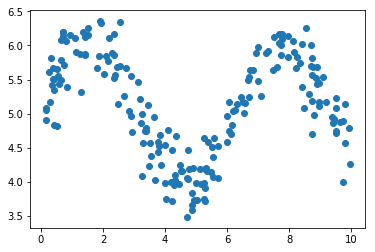

In [5]:
x_train, y_train = produce_batch(200)
x_test, y_test = produce_batch(200)
plt.scatter(x_train, y_train)

In [6]:
def _get_examples_batch():
    
    chosen_id = np.random.randint(0,200, 200)
  
    return x_train[chosen_id], y_train[chosen_id]

Epoch 1/20000 loss: 13.890503883361816
Epoch 501/20000 loss: 0.6354789137840271
Epoch 1001/20000 loss: 0.532836377620697
Epoch 1501/20000 loss: 0.34529194235801697
Epoch 2001/20000 loss: 0.3111180365085602
Epoch 2501/20000 loss: 0.31446412205696106
Epoch 3001/20000 loss: 0.281959593296051
Epoch 3501/20000 loss: 0.27950334548950195
Epoch 4001/20000 loss: 0.26129385828971863
Epoch 4501/20000 loss: 0.20744262635707855
Epoch 5001/20000 loss: 0.26515287160873413
Epoch 5501/20000 loss: 0.28346091508865356
Epoch 6001/20000 loss: 0.25347667932510376
Epoch 6501/20000 loss: 0.3083786070346832
Epoch 7001/20000 loss: 0.25521084666252136
Epoch 7501/20000 loss: 0.2521083950996399
Epoch 8001/20000 loss: 0.22878853976726532
Epoch 8501/20000 loss: 0.25378623604774475
Epoch 9001/20000 loss: 0.24805095791816711
Epoch 9501/20000 loss: 0.1485598385334015
Epoch 10001/20000 loss: 0.26677417755126953
Epoch 10501/20000 loss: 0.20699471235275269
Epoch 11001/20000 loss: 0.21381133794784546
Epoch 11501/20000 loss

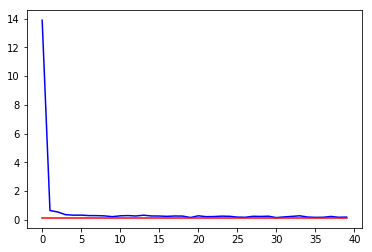

In [50]:
ckpt_dir = 'tmp/regression_model2/'

with tf.Graph().as_default(), tf.Session() as sess:
    
    tf.logging.set_verbosity(tf.logging.INFO)
    
    with tf.variable_scope('mymodel'):
    
        #inputs, targets = convert_data_to_tensors(x_train, y_train)
        inputs = tf.placeholder(tf.float32, shape=(None, 1), name='inputs')
        targets = tf.placeholder(tf.float32, shape=(None, 1), name='targets')
        
        # Make the model.
        predictions, nodes = regression_model(inputs, is_training=True)

        with tf.variable_scope('train'):
            
            # You need this to save the model
            global_step = tf.Variable(0, name='global_step', 
                                      trainable=False,
                                    collections=[tf.GraphKeys.GLOBAL_VARIABLES,
                                     tf.GraphKeys.GLOBAL_STEP])
            
            # Add the loss function to the graph.
            loss = tf.losses.mean_squared_error(labels=targets, predictions=predictions)
    
            # The total loss is the user's loss plus any regularization losses.
            total_loss =  tf.losses.get_total_loss()# slim.losses.get_total_loss()
            
            # Specify the optimizer and create the train op:
            optimizer = tf.train.AdamOptimizer(learning_rate=0.0005)    
            optimizer.minimize(total_loss,global_step=global_step, name='train_op')
            
            train_op = sess.graph.get_operation_by_name('mymodel/train/train_op')
            
            targets_tensor = sess.graph.get_tensor_by_name('mymodel/targets:0')
            inputs_tensor = sess.graph.get_tensor_by_name('mymodel/inputs:0')
            global_step_tensor = sess.graph.get_tensor_by_name('mymodel/train/global_step:0')

    # Initialize all variables in the model, and then load the pre-trained
    sess.run(tf.global_variables_initializer())
    minibatch_size = 50
    n_batches = 20000
    costs= []
    for _num_batches in range(n_batches):
                    
        # Dynamic creates systehetic data
        (xt, yt) = _get_examples_batch()
        
        for i in range(0, 200, minibatch_size):
        
            # Get pair of (X, y) of the current minibatch/chunk
            x_mini = xt[i:i + minibatch_size]
            y_mini = yt[i:i + minibatch_size]

            [loss, num_steps, _] = sess.run( [ total_loss, train_op, global_step_tensor],
                                  feed_dict={inputs_tensor: x_mini, targets_tensor: y_mini })
        
        if _num_batches % 500 == 0:
            costs.append(loss)
            print("Epoch {}/{} loss: {}".format(_num_batches + 1,n_batches, loss ))
    
    
    # Prediction
    #inputs, targets = convert_data_to_tensors(x_test, y_test)
  
    # Create the model structure. (Parameters will be loaded below.)
    predictions, end_points = regression_model(inputs, is_training=False)

#     # Make a session which restores the old parameters from a checkpoint.
#     inputs, predictions, targets = sess.run([inputs, predictions, targets],
#                                            feed_dict={inputs_tensor: x_test, targets_tensor: y_test })

    

    
plt.plot(costs, c='b')
plt.plot(np.ones(len(costs))*0.12,c='r')

# plt.scatter(inputs, targets, c='r');
# plt.scatter(inputs, predictions, c='b');
# plt.title('red=true, blue=predicted')
    
#     # Save model to disk.
#     saver = tf.train.Saver()
#     save_path = saver.save(sess,ckpt_dir, global_step = _num_batches)
#     print("Model saved to {}".format(save_path))

#### Test

In [27]:
# do a prediction

with tf.Graph().as_default():
    inputs, targets = convert_data_to_tensors(x_test, y_test)
  
    # Create the model structure. (Parameters will be loaded below.)
    predictions, end_points = regression_model(inputs, is_training=False)

    # Make a session which restores the old parameters from a checkpoint.
    sv = tf.train.Supervisor(logdir=ckpt_dir)
    with sv.managed_session() as sess:
        inputs, predictions, targets = sess.run([inputs, predictions, targets])

plt.scatter(inputs, targets, c='r');
plt.scatter(inputs, predictions, c='b');
plt.title('red=true, blue=predicted')

INFO:tensorflow:Restoring parameters from tmp/regression_model2/-9999
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.NotFoundError'>, Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key deep_regression/fc1/biases not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "/home/leandroohf/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/leandroohf/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/

NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key deep_regression/fc1/biases not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "/home/leandroohf/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/leandroohf/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/leandroohf/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/leandroohf/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/leandroohf/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-607bc736f93d>", line 10, in <module>
    sv = tf.train.Supervisor(logdir=ckpt_dir)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 272, in new_func
    return func(*args, **kwargs)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/supervisor.py", line 321, in __init__
    self._init_saver(saver=saver)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/supervisor.py", line 471, in _init_saver
    saver = saver_mod.Saver()
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1281, in __init__
    self.build()
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1293, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1330, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 778, in _build_internal
    restore_sequentially, reshape)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 397, in _AddRestoreOps
    restore_sequentially)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 829, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1463, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/home/leandroohf/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

NotFoundError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key deep_regression/fc1/biases not found in checkpoint
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]


#### Evaluation model

TODO: NOT working Is hard or complicated to work with

You have to run the script in parallel

In [ ]:
log_dir = 'tmp/log'

# Choose the metrics to compute:
names_to_values, names_to_updates = slim.metrics.aggregate_metric_map({
    'RMSE Linear': slim.metrics.streaming_mean_squared_error(predictions=predictions, labels=targets),
    'Mean Abs Error': slim.metrics.streaming_mean_absolute_error(predictions, targets)
})


# Create the summary ops such that they also print out to std output:
summary_ops = []
for metric_name, metric_value in names_to_values.items():
     
    op = tf.summary.scalar(metric_name, metric_value)
    op = tf.Print(op, [metric_value], metric_name)
    summary_ops.append(op)

num_examples = 10000
batch_size = 32
num_batches = math.ceil(num_examples / float(batch_size))

# Setup the global step.
slim.get_or_create_global_step()

output_dir = 'tmp/regression_model/' # Where the summaries are stored.
eval_interval_secs = 0.5 # How often to run the evaluation.

slim.evaluation.evaluation_loop(
    'local',
    ckpt_dir,
    log_dir,
    num_evals=num_batches,
    eval_op=names_to_updates.values(),
    summary_op=tf.summary.merge(summary_ops),
    eval_interval_secs=eval_interval_secs)

### Convolutional (TODO)

In [ ]:
from datasets import flowers

In [ ]:
def my_cnn(images, num_classes, is_training):  # is_training is not used...
    
    with slim.arg_scope([slim.max_pool2d], kernel_size=[3, 3], stride=2):
        net = slim.conv2d(images, 64, [5, 5])
        net = slim.max_pool2d(net)
        net = slim.conv2d(net, 64, [5, 5])
        net = slim.max_pool2d(net)
        net = slim.flatten(net)
        net = slim.fully_connected(net, 192)
        net = slim.fully_connected(net, num_classes, activation_fn=None)       
    return net


**Apply the model to some randomly generated images.**

In [ ]:
import tensorflow as tf

with tf.Graph().as_default():
    # The model can handle any input size because the first layer is convolutional.
    # The size of the model is determined when image_node is first passed into the my_cnn function.
    # Once the variables are initialized, the size of all the weight matrices is fixed.
    # Because of the fully connected layers, this means that all subsequent images must have the same
    # input size as the first image.
    batch_size, height, width, channels = 3, 28, 28, 3
    images = tf.random_uniform([batch_size, height, width, channels], maxval=1)
    
    # Create the model.
    num_classes = 10
    logits = my_cnn(images, num_classes, is_training=True)
    probabilities = tf.nn.softmax(logits)
  
    # Initialize all the variables (including parameters) randomly.
    init_op = tf.global_variables_initializer()
  
    with tf.Session() as sess:
        # Run the init_op, evaluate the model outputs and print the results:
        sess.run(init_op)
        probabilities = sess.run(probabilities)
        
print('Probabilities Shape:')
print(probabilities.shape)  # batch_size x num_classes 

print('\nProbabilities:')
print(probabilities)

print('\nSumming across all classes (Should equal 1):')
print(np.sum(probabilities, 1)) # Each row sums to 1